# Header

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import spinmob as s
from mpl_toolkits import mplot3d
#from scipy import interpolate as interpolate
#from scipy import integrate as integrate
import os
#import camb
#import ctypes
import numba as nb
#import time
#%matplotlib notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


In [10]:
# check directory
os.chdir("D:\Raphael\Dropbox\Mcgill\JupyterNotebook\PHYS512")
os.getcwd()

'D:\\Raphael\\Dropbox\\Mcgill\\JupyterNotebook\\PHYS512'

# Problem 1 (python?)
As I warned in class, there are many, many deeply flawed pseudo-random number generators out there. One widely found version
is the default random number generator in the C standard library. Look at test broken libc.py - this shows how to wrap the C standard library in python, call its random number generator, and save the output. (Note -
the numba wrapper is there for speed but is not required.) I’ve used it to generate random (x,y,z) positions with coordinates between 0 and 231 (the max random integer value in the standard library). The type of PRNG used in the library is notorious for introducing correlations between sequential points, with sets of points in n−dimensional space lying on a surprisingly small number of planes.

To make this effect easier to see, I’ve pulled out all the (x,y,z) triples with 0 < x, y, z < 108 (so about 5% of the total span) and put them in the text file rand points.txt. Show that when correctly viewed, these triples lie along a set of planes (I get about 30) and so are very much not randomly distributed in 3D space. You can either do this by changing the view angle
on a 3D plot, or plotting ax + by, z for suitably chosen a and b. Do you see the same thing happen with python’s random number generator? If possible, can you see the same effect on your local machine? You may need to change the name of the library in the line:

mylib=ctypes.cdll.LoadLibrary(“libc.dylib”)

where libc.so would be standard under a Linux system, and you can google for Windows. If you can’t get this part to work, that’s OK - just state so and you won’t lose points.

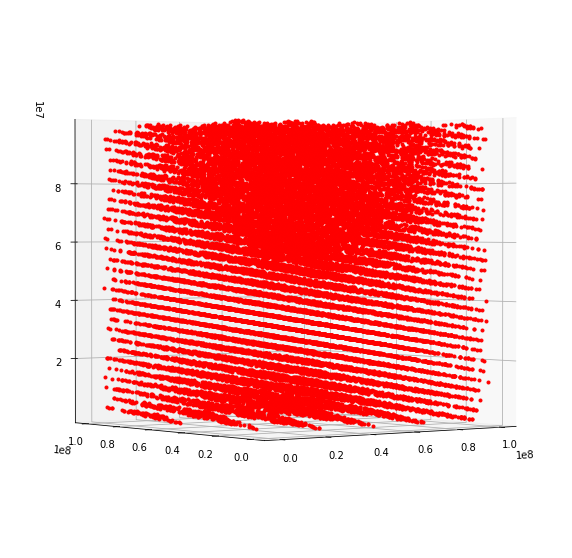

In [11]:
#load the rand_points file
data = np.transpose(np.loadtxt("rand_points.txt"))
x = data[0]
y = data[1]
z = data[2]

size = len(x)

#plot in a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x,y,z,"r.")
ax.view_init(1, -128)

Here, we can easily see the 30 lines of data.

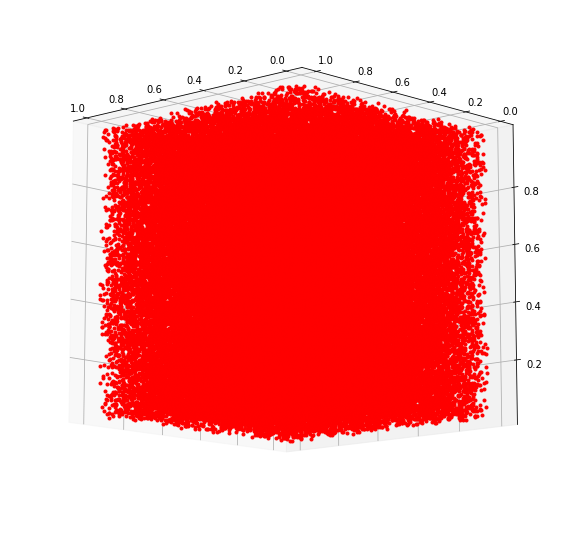

In [12]:
# Creating the same random array using numpy.random.rand
data_np = numpy.random.rand(3,int(3*size))
x = data_np[0]
y = data_np[1]
z = data_np[2]

#plot in a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x,y,z,"r.")
ax.view_init(-11, 133)

Using the pyhton random number generator, I am not able to see this effect (at least, as visible as for the C standart library) Above is my best try to obtain such

I was not able to make it work on my machine.

# Problem 2
We saw in class how to generate exponential deviates using a transformation. Now write a rejection method to generate exponential deviates from another distribution. Which of Lorentzians, Gaussians, and power laws could you use for the bounding distribution? You can assume the exponential deviates are non-negative (since you have to cut off the distribution somewhere, might as well be at zero). Show that a histogram of your deviates matches up with the expected exponential curve. How efficient can you make this generator, in terms of the fraction of uniform deviates that give rise to an exponential deviate?

# Problem 3
Repeat problem 2, but now use a ratio-of-uniforms generator. If u goes from 0 to 1, what are your limits on v? How efficient is this generator, in terms of number of exponential deviates produced per uniform 1 deviate? Make sure to plot the histogram again and show it still produces the correct answer.